In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv('/content/drive/MyDrive/export.csv')


In [3]:
df_clean = df.drop(['age','months_as_customer','policy_number','policy_bind_date','policy_state','policy_csl','policy_deductable','policy_annual_premium','umbrella_limit','insured_zip','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','capital-gains','capital-loss','incident_date','incident_type','collision_type','authorities_contacted','incident_state','incident_city','incident_location','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses', 'police_report_available','auto_make','auto_model','auto_year','property_damage'],axis = 'columns')
df_clean


,incident_severity,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,Major Damage,71610,6510,13020,52080,Y
1,Minor Damage,5070,780,780,3510,Y
2,Minor Damage,34650,7700,3850,23100,N
3,Major Damage,63400,6340,6340,50720,Y
4,Minor Damage,6500,1300,650,4550,N
...,...,...,...,...,...,...
995,Minor Damage,87200,17440,8720,61040,N
996,Major Damage,108480,18080,18080,72320,N
997,Minor Damage,67500,7500,7500,52500,N
998,Major Damage,46980,5220,5220,36540,N


In [4]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   incident_severity   1000 non-null   object
 1   total_claim_amount  1000 non-null   int64 
 2   injury_claim        1000 non-null   int64 
 3   property_claim      1000 non-null   int64 
 4   vehicle_claim       1000 non-null   int64 
 5   fraud_reported      1000 non-null   object
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()                                     
df_clean['incident_severity']=encode.fit_transform(df['incident_severity'])
df_clean['incident_severity']=df_clean['incident_severity']
df_clean.head(5)



,incident_severity,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,0,71610,6510,13020,52080,Y
1,1,5070,780,780,3510,Y
2,1,34650,7700,3850,23100,N
3,0,63400,6340,6340,50720,Y
4,1,6500,1300,650,4550,N


In [6]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()                                     
df_clean['fraud_reported']=encode.fit_transform(df['fraud_reported'])
df_clean['fraud_reported']=df_clean['fraud_reported']
df_clean.head(5)


,incident_severity,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,0,71610,6510,13020,52080,1
1,1,5070,780,780,3510,1
2,1,34650,7700,3850,23100,0
3,0,63400,6340,6340,50720,1
4,1,6500,1300,650,4550,0


In [7]:
X = df_clean.iloc[:, :-1].values
Y = df_clean.iloc[:, -1].values

In [8]:
Y

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)

In [11]:
print(X_train)

[[-1.26794176  0.01759776 -0.3024347  -0.31449853  0.1830905 ]
 [ 0.85000104 -0.26761377 -0.66654466  0.1950205  -0.25072597]
 [-1.26794176  0.19623831 -0.32932918  0.87577132  0.13447313]
 ...
 [ 0.85000104  0.28057505  0.74024383 -0.4105554   0.30490103]
 [-0.20897036  0.01913115 -0.52586581  0.47901471  0.03990969]
 [-1.26794176 -0.49532297 -0.77826022 -0.03050432 -0.48152488]]


In [12]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [13]:
Y_pred=classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]

In [14]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84       180
           1       0.00      0.00      0.00        70

    accuracy                           0.72       250
   macro avg       0.36      0.50      0.42       250
weighted avg       0.52      0.72      0.60       250



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
accuracy_score(Y_test,Y_pred)

[[180   0]
 [ 70   0]]


0.72

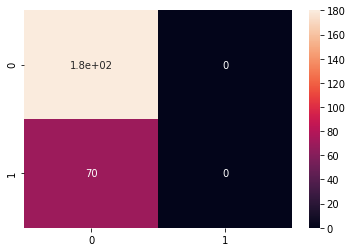

In [16]:
import seaborn as sn
sn.heatmap(confusion_matrix(Y_test,Y_pred),annot=True)

In [ ]:
from matplotlib.colors import ListedColormap
X_set, Y_set = sc_X.inverse_transform(X_train), Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, -1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc_X.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('MFC(Training Set)')
plt.xlabel('Total Insurance Claim')
plt.ylabel('Predicted Fraud Reports')
plt.legend()
plt.show()